In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc, inspect
from dateutil.relativedelta import relativedelta
import datetime as date

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# View all of the classes that automap found

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
engine.execute('SELECT * FROM Measurement').keys()

['id', 'station', 'date', 'prcp', 'tobs']

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

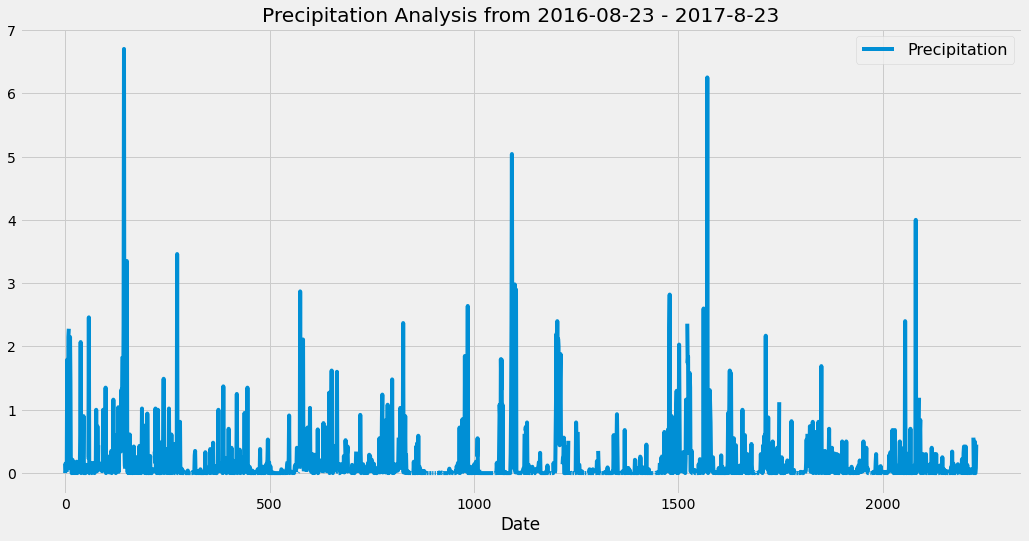

In [31]:
#inspector = inspect(engine)
#columns = inspector.get_columns('Measurement')
#for c in columns:
 #   print(c['name'], c["type"])
#*******************************************************************    

# Design a query to retrieve the last 12 months of precipitation data and plot the results.
last12months = (date.datetime.strptime(recent_date[0], '%Y-%m-%d') - date.timedelta(days=365)).date()
last12months_prec_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last12months ).\
order_by(Measurement.date).all()
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(last12months_prec_data)
precipitation_df = prec_df.rename(columns={"prcp":"Precipitation"})
precipitation_df.tail(10)
precipitation_df.set_index('date').head()
# Sort the dataframe by date
precipitation_df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
ax = precipitation_df.plot(figsize=(16,8))
plt.legend(loc='best', fontsize="16")
ax.set_title(f"Precipitation Analysis from 2016-08-23 - 2017-8-23")
ax.set_xlabel('Date')
plt.show()




In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station.id).count()
print("Total number of stations are {}".format(station_count))

Total number of stations are 9


In [38]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,
                  func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).limit(10).all()
for stations in active_stations:
    #print(row)
    # List the stations and the counts in descending order.
    print(f"Currently there are {stations[1]} stations and the most active station is {stations[0]}")

Currently there are 2772 stations and the most active station is USC00519281
Currently there are 2724 stations and the most active station is USC00519397
Currently there are 2709 stations and the most active station is USC00513117
Currently there are 2669 stations and the most active station is USC00519523
Currently there are 2612 stations and the most active station is USC00516128
Currently there are 2202 stations and the most active station is USC00514830
Currently there are 1979 stations and the most active station is USC00511918
Currently there are 1372 stations and the most active station is USC00517948
Currently there are 511 stations and the most active station is USC00518838


In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station,
                  func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).limit(1).all()
#print(most_active_station[0][0])
active_summary = session.query(Station.id,
                  Station.name,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
.filter(Measurement.station == Station.station)\
.filter(Measurement.station == most_active_station[0][0])
avg_temp = "{0:.2f}".format(active_summary[0][4])
print(f"Most Active Station ID: {active_summary[0][0]}, Name: {most_active_station[0][0]}, Location: {active_summary[0][1]} \n\nResults: \nMinimum temperature recorded:  {active_summary[0][2]}\nMaximum\
 temperture recorded : {active_summary[0][3]}\nAverage temperature recorded:  {avg_temp}")

Most Active Station ID: 7, Name: USC00519281, Location: WAIHEE 837.5, HI US 

Results: 
Minimum temperature recorded:  54.0
Maximum temperture recorded : 85.0
Average temperature recorded:  71.66


# Close session

In [41]:
# Close Session
session.close()